In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/emailsendtime/email_best_send_time_sample_submission.csv
/kaggle/input/emailsendtime/email_best_send_time_test.csv
/kaggle/input/emailsendtime/email_best_send_time_train.csv


In [2]:
TRAIN_PATH = '../input/emailsendtime/email_best_send_time_train.csv'
TEST_PATH = '../input/emailsendtime/email_best_send_time_test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH, index_col='MailID', parse_dates=['SentOn'])
test_df = pd.read_csv(TEST_PATH, index_col='MailID', parse_dates=['SentOn'])
train_df.head()

,Subject,MailBoxID,ContactID,TimeZone,SentOn,Opened
MailID,,,,,,
C278C72C-63D6-4D42-B5A6-455FA2C80D7C,"""Cold emails not converting?""",9F1BAD1D-0370-4200-0045-08D70B884EBA,8977EFF2-DCAD-4E29-B29C-BE55449D24A2,"""(UTC+00:00) Dublin, Edinburgh, Lisbon, London""",2020-09-09 11:34:00,0
F5CA7090-9A73-4197-9923-C094B140C4D1,"""Webnar: Cold emails not converting?""",7FCE4E75-9A26-4EE6-7806-08D6CEFA3BFA,22A565BC-DC52-4CF5-8852-5C343F477F54,"""(UTC-06:00) Central Time (US & Canada)""",2020-09-09 11:35:00,0
B4837C83-9425-4C77-907E-E3B318A5F0F0,"""Cold emails not converting?""",9F1BAD1D-0370-4200-0045-08D70B884EBA,00E3A137-053F-4838-AB6F-4A8F6F52969A,"""(UTC+00:00) Dublin, Edinburgh, Lisbon, London""",2020-09-09 11:38:00,0
204546C3-073D-418E-98BD-E5553B339686,"""Webnar: Cold emails not converting?""",7FCE4E75-9A26-4EE6-7806-08D6CEFA3BFA,9A13D123-10AA-46BF-B5C9-7199074DDD71,"""(UTC-05:00) Eastern Time (US & Canada)""",2020-09-09 11:40:00,0
F28E3C17-0000-4549-9153-5896688E7581,"""Webnar: Cold emails not converting?""",7FCE4E75-9A26-4EE6-7806-08D6CEFA3BFA,FA770B61-2BB3-44EB-A064-0F80CAD8E753,"""(UTC-06:00) Central Time (US & Canada)""",2020-09-09 11:43:00,0


## NaN's

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100144 entries, C278C72C-63D6-4D42-B5A6-455FA2C80D7C to 980A56CD-3649-4369-9497-A1D44AA73550
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Subject    100144 non-null  object        
 1   MailBoxID  100144 non-null  object        
 2   ContactID  100144 non-null  object        
 3   TimeZone   99391 non-null   object        
 4   SentOn     100144 non-null  datetime64[ns]
 5   Opened     100144 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.3+ MB


What about records with a missing timezone?

In [5]:
train_df[train_df['TimeZone'].isna()].head()

,Subject,MailBoxID,ContactID,TimeZone,SentOn,Opened
MailID,,,,,,
0F82328F-7321-4870-8E7F-227248476FB9,"""Hi Ron!""",6E9F1879-3783-4EFE-0046-08D70B884EBA,5A86AC4E-74C5-4E24-B6B1-D8E5C6D481B8,NaN,2020-09-10 13:40:00,0
BA7B72C9-78C3-4442-A34C-37C98B1F2872,"""RE: Salesforce data engine that actually work...",6E9F1879-3783-4EFE-0046-08D70B884EBA,6DA1EF6F-F4BF-4781-8E65-334012A03DFD,NaN,2020-09-14 15:42:00,0
E305CBB7-4454-443C-9669-9DE8A9D93D87,"""Hi Shannon!""",7FCE4E75-9A26-4EE6-7806-08D6CEFA3BFA,88A2EFEE-ADA3-4C36-B1A7-C02E3CAD1326,NaN,2020-09-14 18:23:00,0
B5D39ED9-AE09-4619-99AA-888A5DE4B024,"""RE: Hi Jakub!""",3C8CED29-5F34-4DC7-29FD-08D6F97C8B29,5E83C658-8157-4DB6-BCBB-0FDAE8384C01,NaN,2020-09-16 07:09:00,0
CCD11962-F128-42B6-901C-2A5AD7443FB0,"""RE: Hi Ron!""",6E9F1879-3783-4EFE-0046-08D70B884EBA,5A86AC4E-74C5-4E24-B6B1-D8E5C6D481B8,NaN,2020-09-16 13:44:00,0


Looks OK

## Responses

In [6]:
train_df['Subject'] = train_df['Subject'].str.slice(1, -1)  # remove the quotes
train_df.loc[:, 'IsResponse'] = train_df['Subject'].apply(lambda x: x.lower()[:3] == 're:').astype('int')
train_df['IsResponse'].mean()

0.7155496085636683

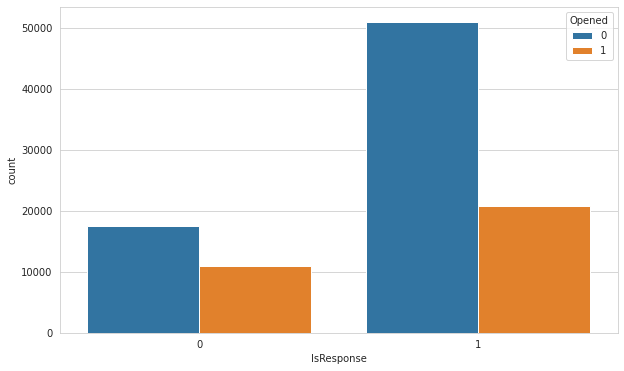

In [7]:
sns.countplot(data=train_df, x='IsResponse', hue='Opened');

New mails have more chance to be opened?

## Unique values

In [8]:
train_df.nunique()

Subject       17747
MailBoxID        29
ContactID     29762
TimeZone         73
SentOn        69282
Opened            2
IsResponse        2
dtype: int64

In [9]:
train_df.drop_duplicates().shape

(100144, 7)

Only 29 unique senders \
73 unique timezones

## Timezones
I think it can be a good idea to split a timezone and a region

In [10]:
train_df['TimeZone'] = train_df['TimeZone'].str.slice(1, -1)  # remove the quotes

In [11]:
train_df['TimeZone'].value_counts()

(UTC-05:00) Eastern Time (US & Canada)                          27249
(UTC-06:00) Central Time (US & Canada)                          24366
(UTC-08:00) Pacific Time (US & Canada)                          19456
(UTC+01:00) Amsterdam, Berlin, Bern, Rome, Stockholm, Vienna     5166
(UTC-07:00) Mountain Time (US & Canada)                          4908
                                                                ...  
(UTC+02:00) Chisinau                                                3
(UTC+02:00) Gaza, Hebron                                            3
(UTC+06:00) Dhaka                                                   3
(UTC-05:00) Chetumal                                                1
(UTC-04:00) Caracas                                                 1
Name: TimeZone, Length: 73, dtype: int64

In [12]:
timezones = train_df['TimeZone'].str.split(n=1, expand=True)
timezones.columns = ['OnlyTimeZone', 'Region']
train_df.join(timezones).tail()

,Subject,MailBoxID,ContactID,TimeZone,SentOn,Opened,IsResponse,OnlyTimeZone,Region
MailID,,,,,,,,,
2EA3A30E-D8DB-44E3-A8B3-CA7D9BA2633C,RE: Revenue Inbox | Sync integration for Sales...,FBCA1245-7297-41A8-1AB0-08D7856F3B8E,FEB418B4-D3FF-4B84-8703-E8A71478C11C,"(UTC+00:00) Dublin, Edinburgh, Lisbon, London",2021-07-01 11:48:00,1,1,(UTC+00:00),"Dublin, Edinburgh, Lisbon, London"
114E23DD-5386-40FA-B7C8-AFD80628FE4D,RE: Hi Jeffrey!,2B68B3E2-ADF7-4D0F-8F59-645C8CDF6EA6,748DFA05-47E9-4FB8-9EA3-0B5619CD6CB6,(UTC-05:00) Eastern Time (US & Canada),2021-07-01 11:48:00,0,1,(UTC-05:00),Eastern Time (US & Canada)
6EE9027F-E9E5-476C-B1F4-F9A6433B5DDF,testy test,66C24EAB-51C7-4B5F-EFCA-08D6D3CCF2FF,E315C9A4-E5C4-484F-9278-6347BE3C2CD1,NaN,2021-07-01 11:55:00,0,0,NaN,NaN
DE170985-95AB-47B6-A077-B7B4BD6C6FF3,"RE: Charlotte, thanks for signing up to Revenu...",FBCA1245-7297-41A8-1AB0-08D7856F3B8E,793680C5-DDFD-41A8-9194-61B1AFC9D9F2,"(UTC+00:00) Dublin, Edinburgh, Lisbon, London",2021-07-01 11:55:00,0,1,(UTC+00:00),"Dublin, Edinburgh, Lisbon, London"
980A56CD-3649-4369-9497-A1D44AA73550,"Michael, thank you for your interest in Revenu...",66BCC422-78B0-4AE2-9D97-CACD6E60CC00,74E02258-2284-4856-BDE9-C493951FB555,(UTC-05:00) Eastern Time (US & Canada),2021-07-01 12:01:00,0,0,(UTC-05:00),Eastern Time (US & Canada)


In [13]:
timezones.nunique()

OnlyTimeZone    26
Region          73
dtype: int64

In [14]:
timezones['OnlyTimeZone'].value_counts()

(UTC-05:00)    28700
(UTC-06:00)    24845
(UTC-08:00)    19456
(UTC+01:00)     8707
(UTC-07:00)     6343
(UTC+00:00)     4688
(UTC+10:00)     1608
(UTC+02:00)     1361
(UTC+05:30)     1040
(UTC+08:00)      483
(UTC-04:00)      395
(UTC+04:00)      363
(UTC-03:00)      340
(UTC+03:00)      291
(UTC+09:30)      216
(UTC+12:00)      172
(UTC+07:00)      104
(UTC+09:00)      103
(UTC+05:00)       64
(UTC-10:00)       53
(UTC-09:00)       27
(UTC-03:30)       10
(UTC+03:30)        9
(UTC+05:45)        7
(UTC+06:00)        3
(UTC+06:30)        3
Name: OnlyTimeZone, dtype: int64

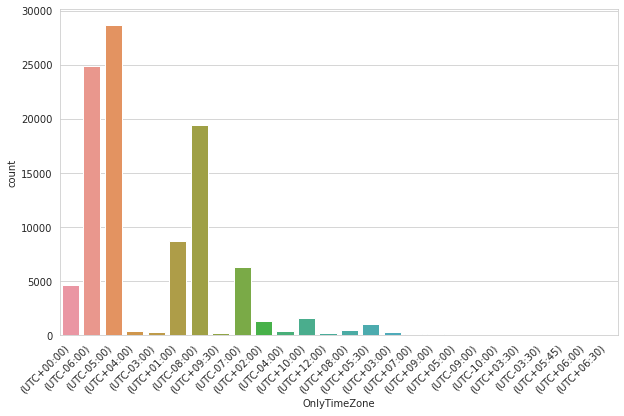

In [15]:
sns.countplot(x=timezones['OnlyTimeZone'])
plt.xticks(rotation=45, ha='right');

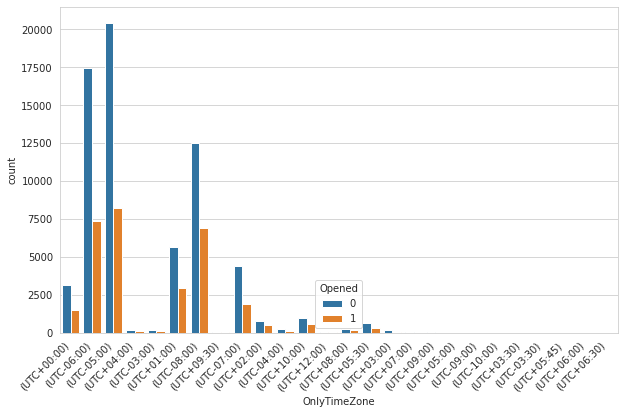

In [16]:
sns.countplot(x=timezones['OnlyTimeZone'], hue=train_df['Opened'])
plt.xticks(rotation=45, ha='right');

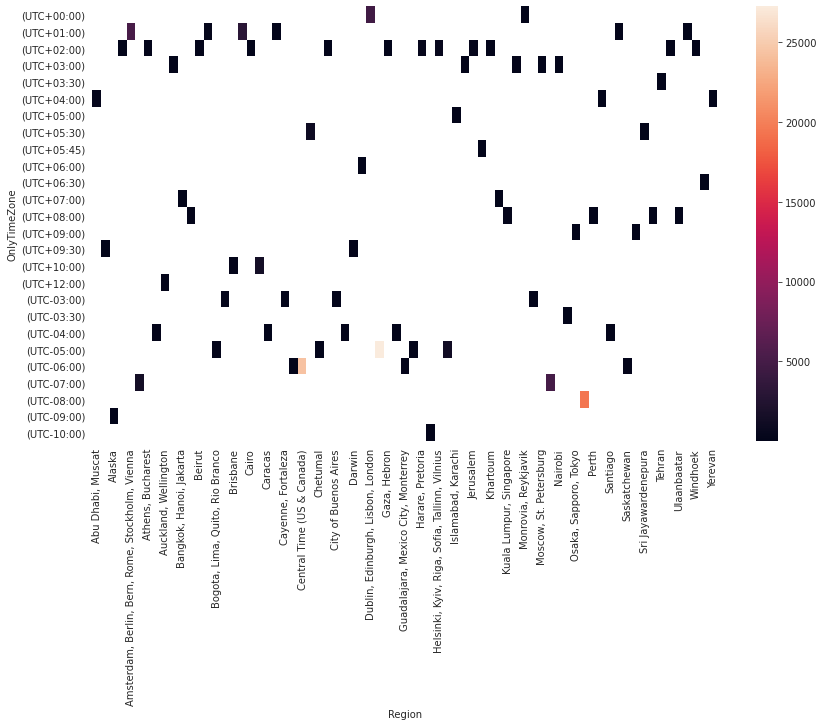

In [17]:
tz_crosstab = pd.crosstab(timezones['OnlyTimeZone'], timezones['Region'])
plt.subplots(figsize=(14, 8))
sns.heatmap(tz_crosstab, mask=(tz_crosstab==0));

# Senders

In [18]:
pd.DataFrame(
    [train_df['MailBoxID'].value_counts(),
    test_df['MailBoxID'].value_counts()], index=['Train', 'Test']
).T

,Train,Test
FBCA1245-7297-41A8-1AB0-08D7856F3B8E,11528.0,11379.0
BDF4495B-0CB0-4ED0-0004-08D7C5C667B0,10260.0,10076.0
7FCE4E75-9A26-4EE6-7806-08D6CEFA3BFA,9084.0,9275.0
9F1BAD1D-0370-4200-0045-08D70B884EBA,8952.0,8886.0
BC150574-818E-4E7E-A8BA-5FF89FA58BD3,8015.0,7869.0
66C24EAB-51C7-4B5F-EFCA-08D6D3CCF2FF,7456.0,7453.0
346C7DF6-6C0C-446A-29FC-08D6F97C8B29,5879.0,5997.0
85248902-F678-4A80-7E11-08D70F5DECC9,5738.0,5667.0
6E9F1879-3783-4EFE-0046-08D70B884EBA,5212.0,5070.0
AD4F6159-49CB-4D35-9C6E-05AF3B427775,5108.0,4985.0


Almost the same MailBoxIDs in both train and test. Maybe it can be a good feature?

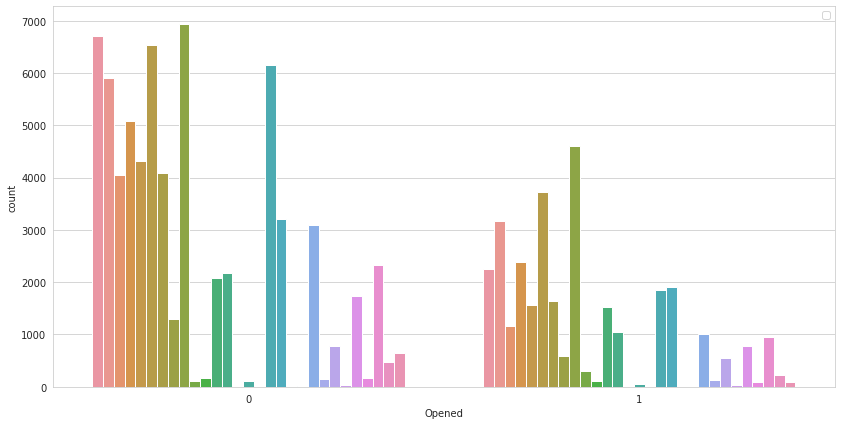

In [19]:
plt.subplots(figsize=(14, 7))
sns.countplot(data=train_df, hue='MailBoxID', x='Opened')
plt.legend([]);

Somewhat differs

## Send time

In [20]:
train_df['SentOn'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  100144
unique                  69282
top       2021-04-08 16:01:00
freq                       11
first     2020-09-09 11:34:00
last      2021-07-01 12:01:00
Name: SentOn, dtype: object

In [21]:
test_df['SentOn'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  100112
unique                  69463
top       2021-06-28 15:03:00
freq                        8
first     2020-09-09 11:38:00
last      2021-07-01 12:02:00
Name: SentOn, dtype: object

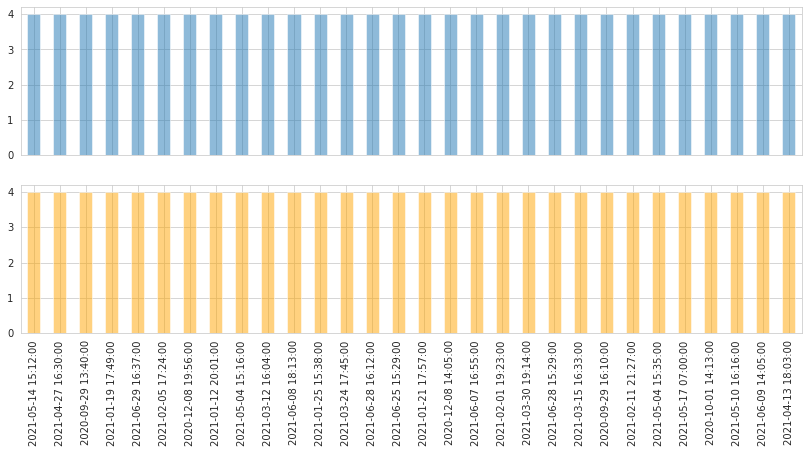

In [22]:
train_time = train_df['SentOn'].value_counts()
test_time = test_df['SentOn'].value_counts()

_, ax = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
idx = 1000
train_time.iloc[idx:idx+30].plot(kind='bar', alpha=0.5, ax=ax[0])
test_time.iloc[idx:idx+30].plot(kind='bar', alpha=0.5, color='orange', ax=ax[1]);

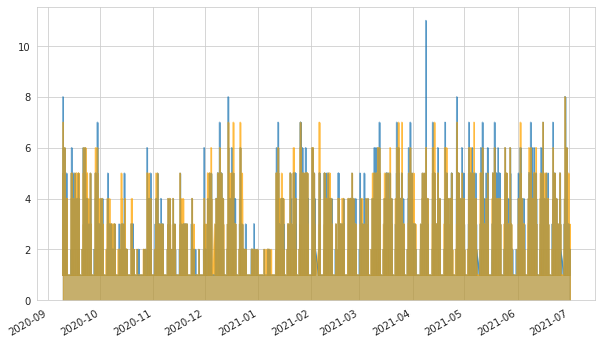

In [23]:
train_time.plot(kind='area', alpha=0.5)
test_time.plot(kind='area', alpha=0.5, color='orange');

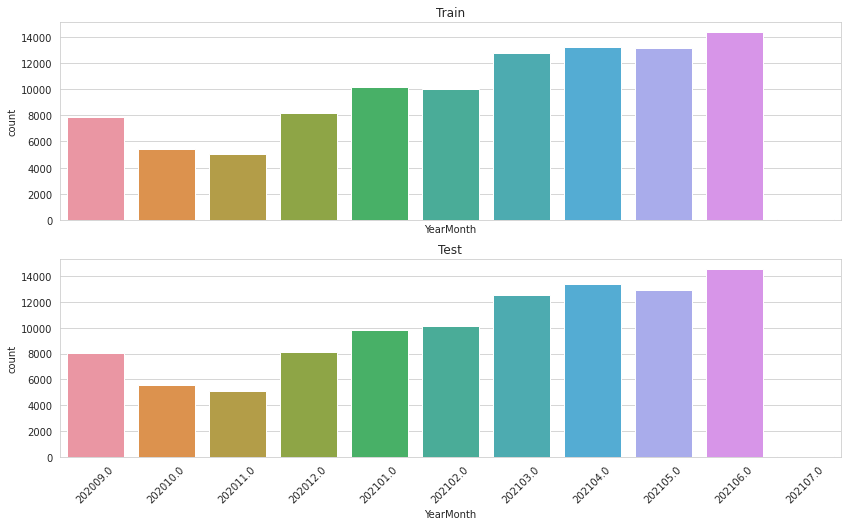

In [24]:
train_df['YearMonth'] = train_df['SentOn'].apply(lambda ts: 100 * ts.year + ts.month).astype("float64")
test_df['YearMonth'] = test_df['SentOn'].apply(lambda ts: 100 * ts.year + ts.month).astype("float64")
_, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
sns.countplot(x=train_df['YearMonth'], ax=ax[0])
sns.countplot(x=test_df['YearMonth'], ax=ax[1])
for ax_ in ax:
    ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45)
ax[0].set_title('Train')
ax[1].set_title('Test');

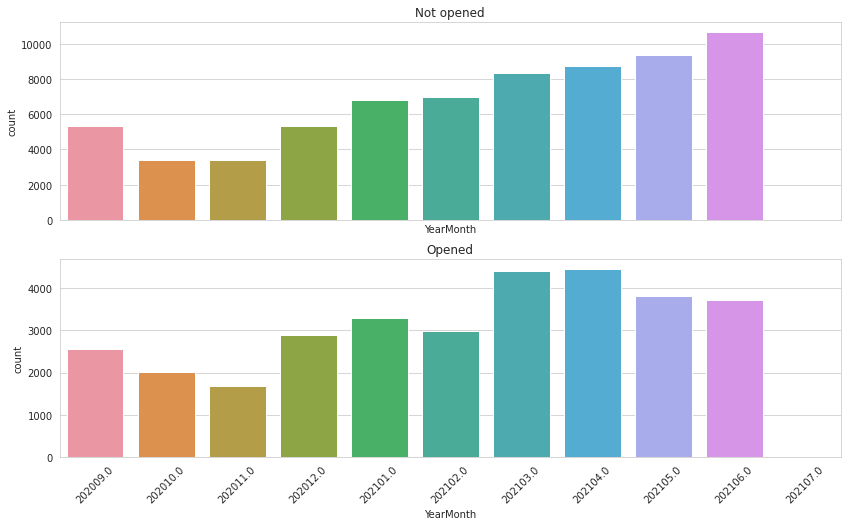

In [25]:
_, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
sns.countplot(x=train_df.loc[train_df['Opened']==0, 'YearMonth'], ax=ax[0])
sns.countplot(x=train_df.loc[train_df['Opened']==1, 'YearMonth'], ax=ax[1])
for ax_ in ax:
    ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45)
ax[0].set_title('Not opened')
ax[1].set_title('Opened');

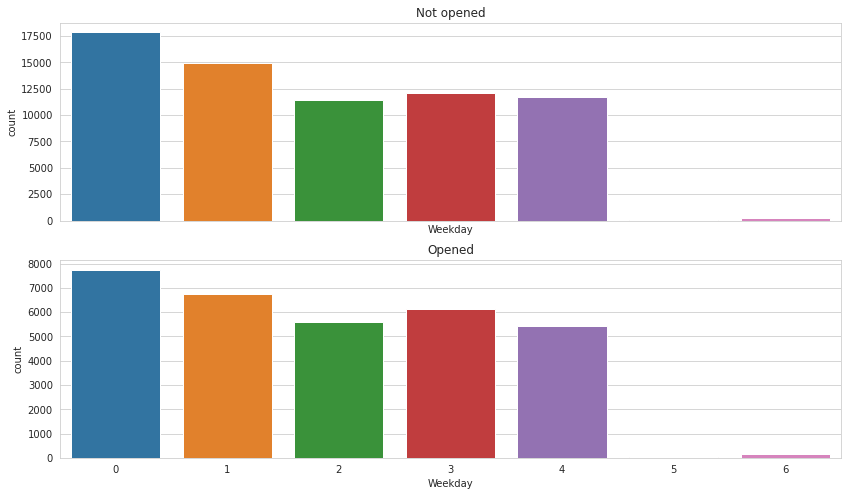

In [26]:
train_df['Weekday'] = train_df['SentOn'].dt.dayofweek

_, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
sns.countplot(x=train_df.loc[train_df['Opened']==0, 'Weekday'], ax=ax[0])
sns.countplot(x=train_df.loc[train_df['Opened']==1, 'Weekday'], ax=ax[1])
ax[0].set_title('Not opened')
ax[1].set_title('Opened');

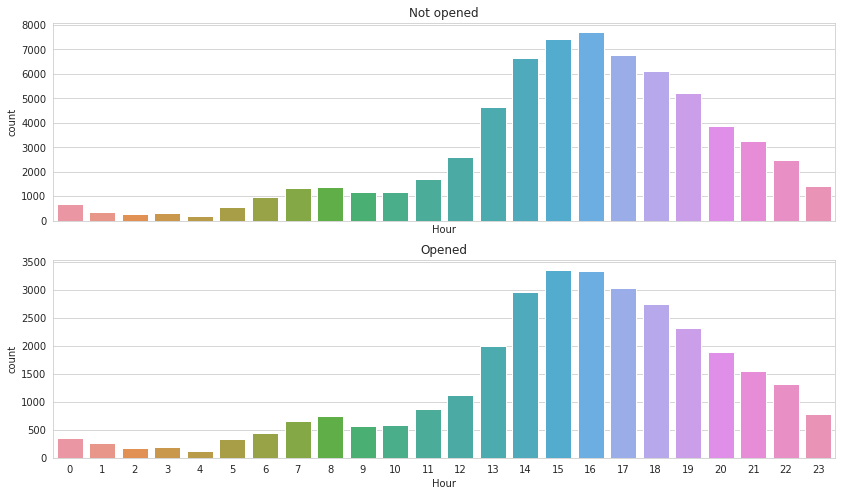

In [27]:
train_df['Hour'] = train_df['SentOn'].dt.hour

_, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
sns.countplot(x=train_df.loc[train_df['Opened']==0, 'Hour'], ax=ax[0])
sns.countplot(x=train_df.loc[train_df['Opened']==1, 'Hour'], ax=ax[1])
ax[0].set_title('Not opened')
ax[1].set_title('Opened');

Let's build the same plot, but with respect to timezone

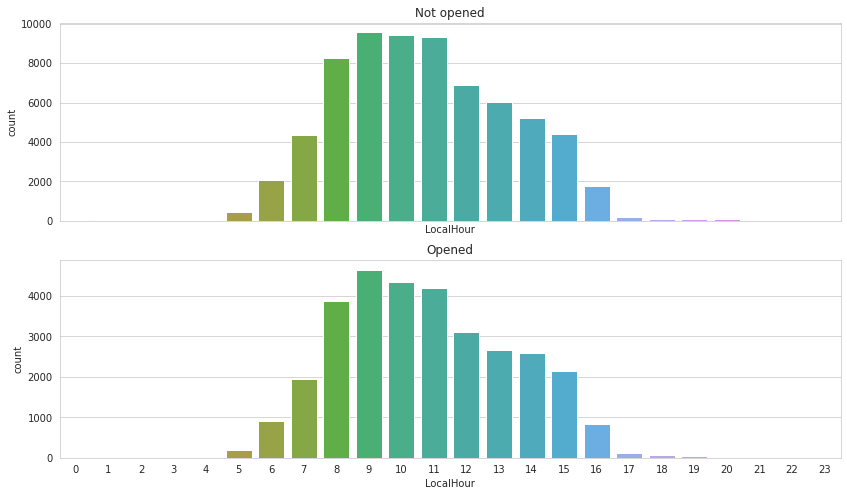

In [28]:
train_df['LocalHour'] = train_df['Hour'] + timezones['OnlyTimeZone'].str.slice(4, 7).fillna(0).astype('int')
train_df['LocalHour'] = (train_df['LocalHour'] + 24) % 24
_, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
sns.countplot(x=train_df.loc[train_df['Opened']==0, 'LocalHour'], ax=ax[0])
sns.countplot(x=train_df.loc[train_df['Opened']==1, 'LocalHour'], ax=ax[1])
ax[0].set_title('Not opened')
ax[1].set_title('Opened');

Distributions looks similar anyway

## Subject

In [29]:
train_df['OnlySubject'] = train_df['Subject']
train_df.loc[train_df['IsResponse']==1, 'OnlySubject'] = train_df.loc[train_df['IsResponse']==1, 'OnlySubject'].str.slice(3)

In [30]:
train_df['SubjectLen'] = train_df['OnlySubject'].apply(lambda x: len(x))

In [31]:
train_df['SubjectLen'].describe()

count    100144.000000
mean         17.788155
std          14.660191
min           0.000000
25%          10.000000
50%          11.000000
75%          19.000000
max         136.000000
Name: SubjectLen, dtype: float64

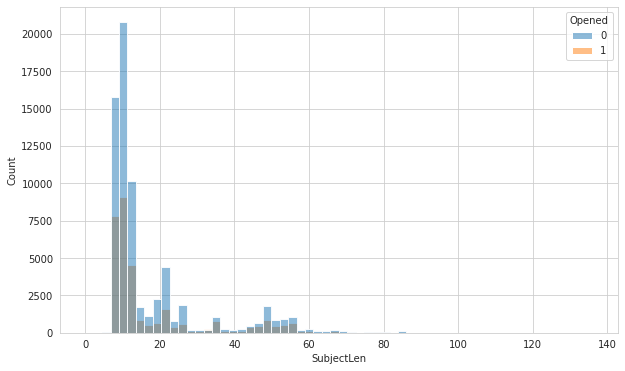

In [32]:
sns.histplot(data=train_df, x='SubjectLen', hue='Opened', bins=60);

In [33]:
%%capture
%pip install wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

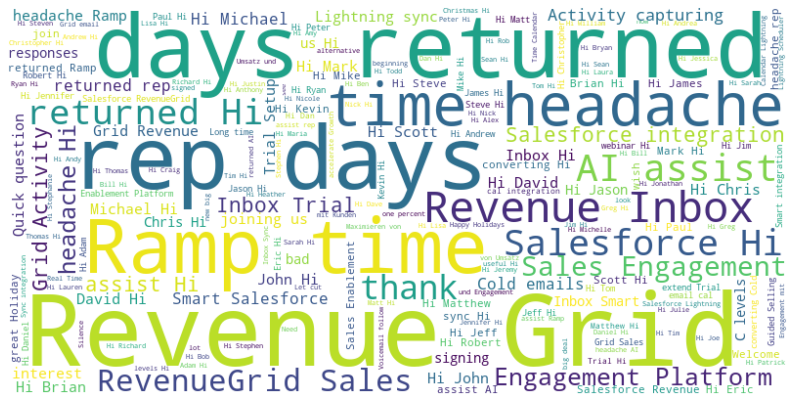

In [35]:
text = " ".join(x for x in train_df['OnlySubject'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.subplots(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

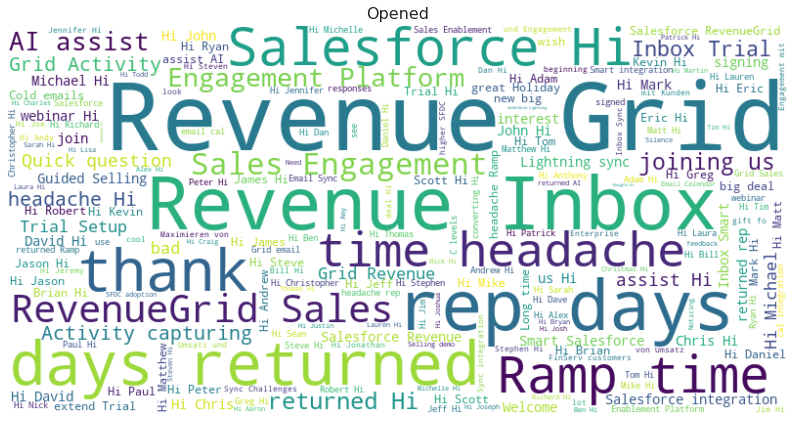

In [36]:
opened_text = " ".join(x for x in train_df.loc[train_df['Opened']==1, 'OnlySubject'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(opened_text)

plt.subplots(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Opened', fontsize=16)
plt.axis("off");

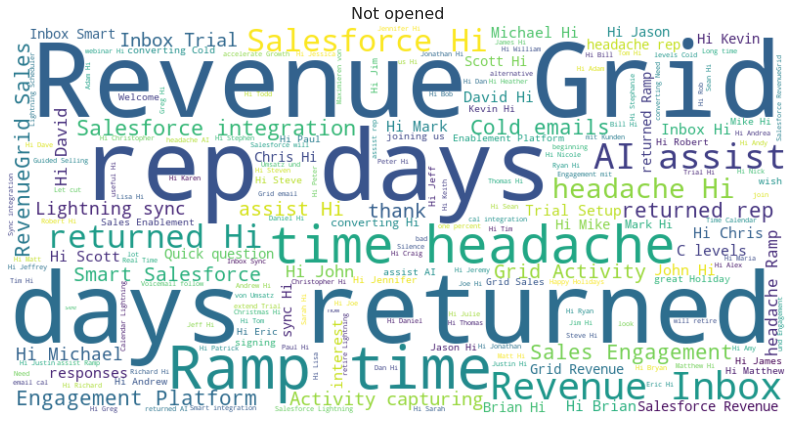

In [37]:
not_opened_text = " ".join(x for x in train_df.loc[train_df['Opened']==0, 'OnlySubject'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(not_opened_text)

plt.subplots(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Not opened', fontsize=16)
plt.axis("off");

In [38]:
# Not opened subject top words
pd.Series(not_opened_text.lower().split()).value_counts().head(15)

hi            42847
revenue        5945
for            4766
salesforce     4387
grid           3899
returned       3490
761            3490
rep-days       3490
time           2985
-              2842
inbox          2743
headache       2623
ramp           2623
to             2616
hi,            2237
dtype: int64

In [39]:
# Opened subject top words
pd.Series(opened_text.lower().split()).value_counts().head(15)

hi            19737
revenue        3674
for            3244
grid           2344
salesforce     2184
-              1568
you            1526
inbox          1476
761            1189
rep-days       1189
returned       1189
to             1128
time            962
thank           958
sales           827
dtype: int64

Without preprocessing it looks quite similar. Maybe the subject doesn't impact too much